## Imports

In [375]:
# Data
import numpy as np
import pandas as pd

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

## Data Frames

In [376]:
df_2015 = pd.read_csv('data/2015.csv')
df_2016 = pd.read_csv('data/2016.csv')
df_2017 = pd.read_csv('data/2017.csv')

In [377]:
df_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [378]:
df_2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


### Adding `Region` back in to `df_2017`

In [379]:
def region_dict(pd_data_frame):
    
    """ This function captures the region of a country from previous data frames """
    
    output = dict()
    
    for _, row in pd_data_frame.iterrows():
        if row["Country"] not in output:
            output[row["Country"]] = row["Region"]
    
    return output

In [380]:
dict_1 = region_dict(df_2015)
dict_2 = region_dict(df_2016)

In [381]:
def join_dicts(dict_1, dict_2):
    
    """ This fucntion will join 2 dictionaries and remove duplicates """
    
    for key, value in dict_2.items():
        if key not in dict_1:
            dict_1[key] = value
    
    return dict_1

dict_3 = join_dicts(dict_1, dict_2)

In [382]:
def add_region(pd_data_frame):
    
    """ This function will add the region back into the dataframe """
    # set regions series     
    regions = []
    for country in pd_data_frame["Country"]:
        try: 
            regions.append(dict_3[country])
        except:
            regions.append("N/A")
            
    # set region column to regions series    
    pd_data_frame['Region'] = regions
    return pd_data_frame

df_2017 = add_region(df_2017)

df_2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe


### I don't like the way `df_2017` is formatted!

In [383]:
df_2017 = df_2017[[
    "Country","Region","Happiness.Rank","Happiness.Score","Whisker.low","Whisker.high","Economy..GDP.per.Capita.",
    "Family","Health..Life.Expectancy.","Freedom","Generosity","Trust..Government.Corruption.","Dystopia.Residual"
                  ]]

In [384]:
df_2017.head(2)

,Country,Region,Happiness.Rank,Happiness.Score,Whisker.low,Whisker.high,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,Western Europe,1,7.537,7.479556,7.594445,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,7.462272,7.581728,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [385]:
df_2017.columns = df_2016.columns

In [386]:
df_2017.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Norway,Western Europe,1,7.537,7.479556,7.594445,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,7.462272,7.581728,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


## What can I predict?

- I will predict `Happiness Score` based off of **GDP, Family, Health, Freedom, Trust, Generosity & Dystopia Residual** :)
- Will most likely be a multi-variable regression model.

In [387]:
# Dropping unnecessary cells
df_2015.drop(['Country', 'Region', 'Happiness Rank', 'Standard Error'], axis=1, inplace=True)
df_2016.drop(['Country', 'Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1, inplace=True)
df_2017.drop(['Country', 'Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1, inplace=True)

In [388]:
# Merging data frames 
data_frames = [df_2015, df_2016, df_2017]
df_merged = pd.concat(data_frames)
df_merged.head(3)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [389]:
target = df_merged["Happiness Score"]
features = df_merged.drop("Happiness Score", axis=1)
target.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [390]:
features.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


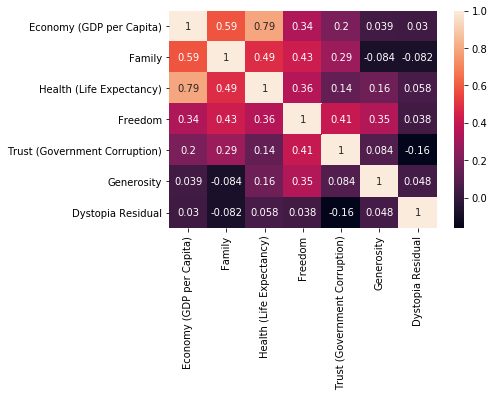

In [391]:
sns.heatmap(features.corr(), annot=True)

## Splitting, scaling & fitting data

In [392]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, test_size=0.20)

# Scaling & fitting
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

## Note
- We use `fit_transform()` on the training data so that we learn the parameters of scaling on the train data and in the same time we scale the train data. 
- We only use `transform()` on the test data because we use the scaling paramaters learned on the train data to scale the test data.

## Apply Linear Regression Model

In [422]:
# Even for a regression model for multiple features, LinearRegression can still be used as the data was split with these features
lr_model = LinearRegression()
lr_model.fit(X_minmax, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict scalar values using fitted model against test data (`X_test`)

In [423]:
y_pred = lr_model.predict(X_test)

## Compare `y_pred` & `y_test` using r^2 & MSE

In [424]:
rsq = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2 Score: {rsq}")
print(f"MSE Score: {mse}")

R^2 Score: -30.772658655593453
MSE Score: 45.53369633451199


### A negative r^2 score, hmmm...

- We already scaled the data, and we can't drop correlated features with `Happiness Score` as there arent any (look at heatmap).
- Is it time to boost?

In [406]:
# Boosting linear regression model
gbrt=GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(X_train, y_train) 
y_pred=gbrt.predict(X_test) 

In [407]:
rsq = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2 Score: {rsq}")
print(f"MSE Score: {mse}")

R^2 Score: 0.9680886856508941
MSE Score: 0.045732405114657856


## What is boosting?
- It is an ensemble method; a family of algorithms that are able to convert weak learners to strong learners. 
- Many weak algorithms working together do better than 1 big, monolithic algorithm (Wisdom of the crowds)
-  Boosting is an ensemble method for improving the model predictions of any given learning algorithm. The idea of boosting is to train weak learners sequentially, each trying to correct its predecessor.

<img src="https://miro.medium.com/max/1600/0*qCcM7uCOqIw6npnJ.png"></img>

## Maybe the way we are splitting our data is part of the problem as well? 
- Train, test, split method is pretty good. You are training a model with 80% of data, and leaving the rest to see how well it trained the model. This is a good way to test the model as it has not seen the remaining 20% of the data. 
- However, it could be the case that the data that is given to the model, however unlikely, is entirely 1 type of data and our test data is of another type. This can effect the performance of the model.
- For example, lets assume our data are a bank math problems; it could be the case that we train a student with just algebra problems. The remaining questions in the bank could be calculus problems and the student wouldn't be effectively trained to solve them.
- The solution to this? **K fold cross validation**